### Quantile Rgression frest test as in:
https://scikit-garden.github.io/examples/QuantileRegressionForests/


* We will now use the ExtraTreesQuantileRegressor from scikit-garden to plot prediction intervals on the boston dataset.
* Import necessary things

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from skgarden import RandomForestQuantileRegressor

* Load data and the necessary estimators. Note that min_samples_split is set to 10 and the cross-validation is 5-split.

In [2]:
boston = load_boston()
X, y = boston.data, boston.target
kf = KFold(n_splits=5, random_state=0)
rfqr = RandomForestQuantileRegressor(random_state=0, min_samples_split=10, n_estimators=1000)

* Store the quantiles at the 98.5th and 2.5th percentile.

In [3]:
y_true_all = []
lower = []
upper = []

for train_index, test_index in kf.split(X):
    X_train, X_test, y_train, y_test = (
        X[train_index], X[test_index], y[train_index], y[test_index])

    rfqr.set_params(max_features=X_train.shape[1] // 3)
    rfqr.fit(X_train, y_train)
    y_true_all = np.concatenate((y_true_all, y_test))
    upper = np.concatenate((upper, rfqr.predict(X_test, quantile=98.5)))
    lower = np.concatenate((lower, rfqr.predict(X_test, quantile=2.5)))

interval = upper - lower
sort_ind = np.argsort(interval)
y_true_all = y_true_all[sort_ind]
upper = upper[sort_ind]
lower = lower[sort_ind]
mean = (upper + lower) / 2

# Center such that the mean of the prediction interval is at 0.0
y_true_all -= mean
upper -= mean
lower -= mean

* Plot the prediction intervals, the original target values. We see that most of the samples lie within the 95 p.c prediction interval.

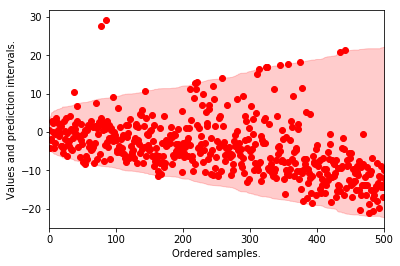

In [4]:
plt.plot(y_true_all, "ro")
plt.fill_between(
    np.arange(len(upper)), lower, upper, alpha=0.2, color="r",
    label="Pred. interval")
plt.xlabel("Ordered samples.")
plt.ylabel("Values and prediction intervals.")
plt.xlim([0, 500])
plt.show()

In [5]:
X.shape

(506, 13)

In [6]:
y.shape

(506,)